In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [5]:
df.shape

(545, 13)

In [6]:
## checking the depend varaible
df['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

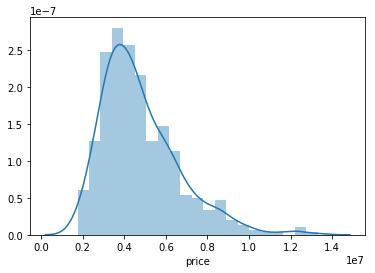

In [7]:
sns.distplot(df['price'])

In [8]:
## Almost as normal curve 

In [10]:
### to get all cetogrical olumns
df.select_dtypes(include=['object']).columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
cat_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [12]:
# here in the drop first it will select alpha numrical hence no and funireshed will drop
dfc=pd.get_dummies(df,columns=cat_cols,drop_first=True) 

In [13]:
dfc.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


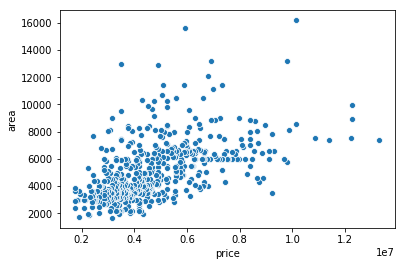

In [15]:
## Here area and price is related so we are checking the relation 
sns.scatterplot(x=dfc['price'],y=dfc['area'])

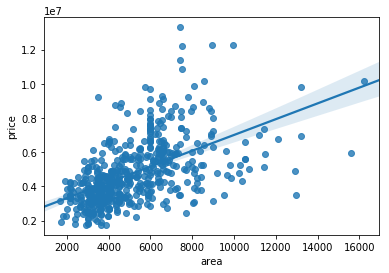

In [16]:
sns.regplot('area','price',dfc)

### Create model

In [17]:
x=dfc.drop('price',axis=1)

In [19]:
y=dfc['price']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [23]:
import statsmodels.api as sm

In [29]:
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [24]:
x_trainc=sm.add_constant(x_train)
x_testc=sm.add_constant(x_test)
est=sm.OLS(y_train,x_trainc)
result=est.fit()
print(result.summary())


C:\Users\Trinadh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     63.79
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           1.00e-85
Time:                        12:35:39   Log-Likelihood:                -5797.3
No. Observations:                 381   AIC:                         1.162e+04
Df Residuals:                     367   BIC:                         1.168e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

R-squared:69.3% of variation is expaled price is explained by independent variables
Adj. R-squared: Is beacuse of linear regression has an tendency of if unnessary variables it will increase the R-square
F-statistic: Ratio of the
F-statistic: 

Omnibus:                       61.032   Durbin-Watson:                   1.895(between 1-2 and auto-colinerity)
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.413
Skew:                           0.805   Prob(JB):                     4.38e-32
Kurtosis:                       5.550   Cond. No.                     3.51e+04

In [34]:
# calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['features']=x_train.columns
vif

,vif,features
0,8.228816,area
1,17.333623,bedrooms
2,10.263925,bathrooms
3,8.192998,stories
4,1.936562,parking
5,7.035432,mainroad_yes
6,1.560251,guestroom_yes
7,2.176960,basement_yes
8,1.106905,hotwaterheating_yes
9,1.857988,airconditioning_yes


In [35]:
x_train.corr()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,1.000000,0.150933,0.191068,0.069115,0.322459,0.296792,0.163146,0.039259,0.001753,0.230055,0.210699,0.003251,-0.124330
bedrooms,0.150933,1.000000,0.406218,0.415340,0.136585,-0.032378,0.071564,0.085510,0.028803,0.225595,0.055724,0.034190,-0.121150
bathrooms,0.191068,0.406218,1.000000,0.332465,0.139427,0.010447,0.076222,0.081185,0.043428,0.204895,0.004923,0.035982,-0.119306
stories,0.069115,0.415340,0.332465,1.000000,0.038438,0.085811,0.058409,-0.204091,0.032190,0.329484,-0.009994,-0.027646,-0.107335
parking,0.322459,0.136585,0.139427,0.038438,1.000000,0.171942,0.011934,0.021634,0.093102,0.175432,0.109114,0.024780,-0.135628
mainroad_yes,0.296792,-0.032378,0.010447,0.085811,0.171942,1.000000,0.092091,0.042987,-0.009268,0.106985,0.221095,0.003812,-0.130545
guestroom_yes,0.163146,0.071564,0.076222,0.058409,0.011934,0.092091,1.000000,0.399894,-0.052197,0.151325,0.194051,0.049381,-0.131048
basement_yes,0.039259,0.085510,0.081185,-0.204091,0.021634,0.042987,0.399894,1.000000,-0.029223,0.099756,0.239992,0.059568,-0.135212
hotwaterheating_yes,0.001753,0.028803,0.043428,0.032190,0.093102,-0.009268,-0.052197,-0.029223,1.000000,-0.135291,-0.047778,0.034338,-0.055849
airconditioning_yes,0.230055,0.225595,0.204895,0.329484,0.175432,0.106985,0.151325,0.099756,-0.135291,1.000000,0.085179,-0.054314,-0.103340


In [36]:
x_train1=x_train.drop(['bathrooms'],axis=1)
x_test1=x_test.drop(['bathrooms'],axis=1)
x_trainc=sm.add_constant(x_train)
x_testc=sm.add_constant(x_test)
est=sm.OLS(y_train,x_train1)
result=est.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     638.2
Date:                Thu, 03 Oct 2019   Prob (F-statistic):          2.53e-238
Time:                        14:35:59   Log-Likelihood:                -5837.0
No. Observations:                 381   AIC:                         1.170e+04
Df Residuals:                     369   BIC:                         1.175e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
area      

C:\Users\Trinadh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_train1.values,i) for i in range(x_train1.shape[1])]
vif['features']=x_train1.columns
vif

,vif,features
0,7.977868,area
1,14.541281,bedrooms
2,7.778112,stories
3,1.932219,parking
4,7.030341,mainroad_yes
5,1.559453,guestroom_yes
6,2.138417,basement_yes
7,1.105780,hotwaterheating_yes
8,1.857435,airconditioning_yes
9,1.499821,prefarea_yes


In [39]:
x_train1=x_train.drop(['bathrooms','furnishingstatus_semi-furnished'],axis=1)
x_test1=x_test.drop(['bathrooms','furnishingstatus_semi-furnished'],axis=1)
x_trainc=sm.add_constant(x_train)
x_testc=sm.add_constant(x_test)
est=sm.OLS(y_train,x_train1)
result=est.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     698.1
Date:                Thu, 03 Oct 2019   Prob (F-statistic):          9.49e-240
Time:                        14:37:33   Log-Likelihood:                -5837.0
No. Observations:                 381   AIC:                         1.170e+04
Df Residuals:                     370   BIC:                         1.174e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area            

In [40]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_train1.values,i) for i in range(x_train1.shape[1])]
vif['features']=x_train1.columns
vif

,vif,features
0,7.944337,area
1,13.281717,bedrooms
2,7.773268,stories
3,1.928379,parking
4,6.929407,mainroad_yes
5,1.559313,guestroom_yes
6,2.136946,basement_yes
7,1.105778,hotwaterheating_yes
8,1.824108,airconditioning_yes
9,1.497715,prefarea_yes


In [41]:
x_train1=x_train.drop(['bathrooms','furnishingstatus_semi-furnished','guestroom_yes'],axis=1)
x_test1=x_test.drop(['bathrooms','furnishingstatus_semi-furnished','guestroom_yes'],axis=1)
x_trainc=sm.add_constant(x_train)
x_testc=sm.add_constant(x_test)
est=sm.OLS(y_train,x_train1)
result=est.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     765.2
Date:                Thu, 03 Oct 2019   Prob (F-statistic):          1.00e-240
Time:                        14:38:35   Log-Likelihood:                -5838.1
No. Observations:                 381   AIC:                         1.170e+04
Df Residuals:                     371   BIC:                         1.174e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area            

In [42]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_train1.values,i) for i in range(x_train1.shape[1])]
vif['features']=x_train1.columns
vif

,vif,features
0,7.823598,area
1,13.155140,bedrooms
2,7.660882,stories
3,1.922006,parking
4,6.927763,mainroad_yes
5,1.831682,basement_yes
6,1.104313,hotwaterheating_yes
7,1.819799,airconditioning_yes
8,1.488747,prefarea_yes
9,1.410550,furnishingstatus_unfurnished


### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression(fit_intercept=True)


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [48]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.6463350878895877

In [49]:
y_train1=np.log(y_train)
y_test1=np.log(y_test)
lr.fit(x_train,y_train1)
y_pred=lr.predict(x_test)
r2_score(y_test1,y_pred)

0.6593694138932609

We tried to transform the price(log) to check if accuracy may be improved

In [61]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [62]:
params=[{'n_features_to_select':list(range(1,14))}]

In [63]:
lr=LinearRegression()

In [64]:
rfe=RFE(lr)

In [65]:
model_cv=GridSearchCV(estimator=rfe,param_grid=params,scoring='r2',cv=3,return_train_score='True')
model_cv.fit(x_train,y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score='True',
             scoring='r2', verbose=0)

In [71]:
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.033335,0.003772,0.003667,9.429093e-04,1,{'n_features_to_select': 1},0.325055,0.108476,0.273291,0.235607,0.092346,13,0.227110,0.324117,0.277423,0.276217,0.039612
1,0.016334,0.000471,0.002000,1.123916e-07,2,{'n_features_to_select': 2},0.419905,0.203398,0.342257,0.321853,0.089558,12,0.371813,0.399295,0.433467,0.401525,0.025220
2,0.016668,0.001700,0.002333,4.713704e-04,3,{'n_features_to_select': 3},0.428958,0.405970,0.403771,0.412900,0.011390,11,0.385776,0.470336,0.489815,0.448643,0.045159
3,0.014334,0.000943,0.002333,4.713704e-04,4,{'n_features_to_select': 4},0.475190,0.475172,0.414235,0.454865,0.028730,10,0.452107,0.503708,0.502272,0.486029,0.023994
4,0.015667,0.002055,0.002667,9.428531e-04,5,{'n_features_to_select': 5},0.471831,0.490301,0.440338,0.467490,0.020627,9,0.496322,0.523001,0.556756,0.525360,0.024728


In [72]:
model_cv.best_params_

{'n_features_to_select': 13}

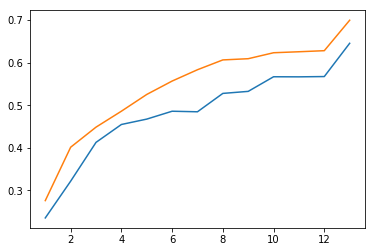

In [74]:
plt.plot(cv_result['param_n_features_to_select'],cv_result['mean_test_score'])
plt.plot(cv_result['param_n_features_to_select'],cv_result['mean_train_score'])
plt.show()

In [75]:
n_features=10
rfe=RFE(lr,n_features_to_select=n_features)
rfe=rfe.fit(x_train,y_train)
y_pred=rfe.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.6028024741762792


In [77]:
col=pd.DataFrame(list(zip(x_train.columns,rfe.support_,rfe.ranking_)),
                columns=['cols','select','rank'])
col

,cols,select,rank
0,area,False,4
1,bedrooms,False,3
2,bathrooms,True,1
3,stories,True,1
4,parking,True,1
5,mainroad_yes,True,1
6,guestroom_yes,True,1
7,basement_yes,True,1
8,hotwaterheating_yes,True,1
9,airconditioning_yes,True,1


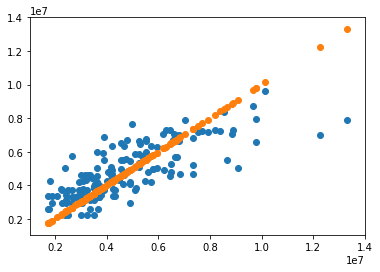

In [79]:
plt.scatter(y_test,y_pred)
plt.scatter(y_test,y_test)
plt.show()

### Regularization

In [80]:
from sklearn.linear_model import Ridge,Lasso

In [98]:
lasso=Lasso(alpha=10)
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)
r2_score(y_test,y_pred)

0.646330912638855

In [99]:
lasso.coef_

array([ 2.53299449e+02,  8.08876242e+04,  1.11471568e+06,  4.17278848e+05,
        3.03111763e+05,  4.07997934e+05,  2.75660881e+05,  4.82598382e+05,
        6.16157423e+05,  6.85797585e+05,  5.09152552e+05, -1.21562567e+05,
       -3.91111641e+05])

In [100]:
pd.DataFrame(list(zip(x_train.columns,lasso.coef_)),columns=['cols','coefs'])

,cols,coefs
0,area,2.532994e+02
1,bedrooms,8.088762e+04
2,bathrooms,1.114716e+06
3,stories,4.172788e+05
4,parking,3.031118e+05
5,mainroad_yes,4.079979e+05
6,guestroom_yes,2.756609e+05
7,basement_yes,4.825984e+05
8,hotwaterheating_yes,6.161574e+05
9,airconditioning_yes,6.857976e+05


### Ridge

In [102]:
ridge=Ridge()

In [103]:
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
r2_score(y_test,y_pred)

0.6457927843743898

In [104]:
pd.DataFrame(list(zip(x_train.columns,ridge.coef_)),columns=['cols','coefs'])

,cols,coefs
0,area,2.548261e+02
1,bedrooms,8.455633e+04
2,bathrooms,1.099963e+06
3,stories,4.193109e+05
4,parking,3.043556e+05
5,mainroad_yes,3.998649e+05
6,guestroom_yes,2.740628e+05
7,basement_yes,4.812783e+05
8,hotwaterheating_yes,5.823741e+05
9,airconditioning_yes,6.761131e+05


In [105]:
ridge=Ridge(alpha=100)
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
r2_score(y_test,y_pred)

0.5803340396507831

In [106]:
pd.DataFrame(list(zip(x_train.columns,ridge.coef_)),columns=['cols','coefs'])

,cols,coefs
0,area,325.918857
1,bedrooms,204257.894234
2,bathrooms,513307.185848
3,stories,396381.470172
4,parking,268578.599339
5,mainroad_yes,148973.069522
6,guestroom_yes,178686.302664
7,basement_yes,296308.848944
8,hotwaterheating_yes,86226.973665
9,airconditioning_yes,351169.830798
